# Live Code 3 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS 001

This dataset contains 6 columns and 223 Rows. Each row corresponds to a country in order of their life expectancy rank. The dataset has three numeric columns, Overall Life Expectancy, Male Life Expectancy and Female Life Expectancy.
The last column is Continent, which defines which continent that country lies in. This could be very well used as a class for the data.

This data can be used for classification by various techniques like SVM(linear), KNN, C.45 etc. and other supervised and unsupervised techniques.

https://www.kaggle.com/amansaxena/lifeexpectancy

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

%matplotlib inline

# Data Loading

In [2]:
# we can see all the columns
pd.set_option('display.max_columns', 100)

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
rawdf = pd.read_csv('Life_expectancy_dataset.csv')

# Dataset Exploration

In [4]:
rawdf.shape

(223, 6)

In [5]:
rawdf.head(5)

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [6]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [7]:
rawdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,223.0,112.000000,64.518731,1.0,56.50,112.0,167.50,223.0
Overall Life,223.0,72.487892,8.459335,50.2,67.45,74.9,78.60,89.5
Male Life,223.0,70.041704,8.074942,48.6,64.50,72.2,75.85,85.6
Female Life,223.0,75.019283,8.986633,51.0,69.75,77.9,81.60,93.5


# Data Cleaning

In [8]:
rawdf.isnull().sum().any()

False

In [9]:
rawdf.duplicated().any()

False

Dari hasil pemeriksaan diatas (*missing values* dan *duplicated rows*), sepertinya dataset sudah dibersihkan sebelumnya.

# Data Exploration (EDA)

In [10]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

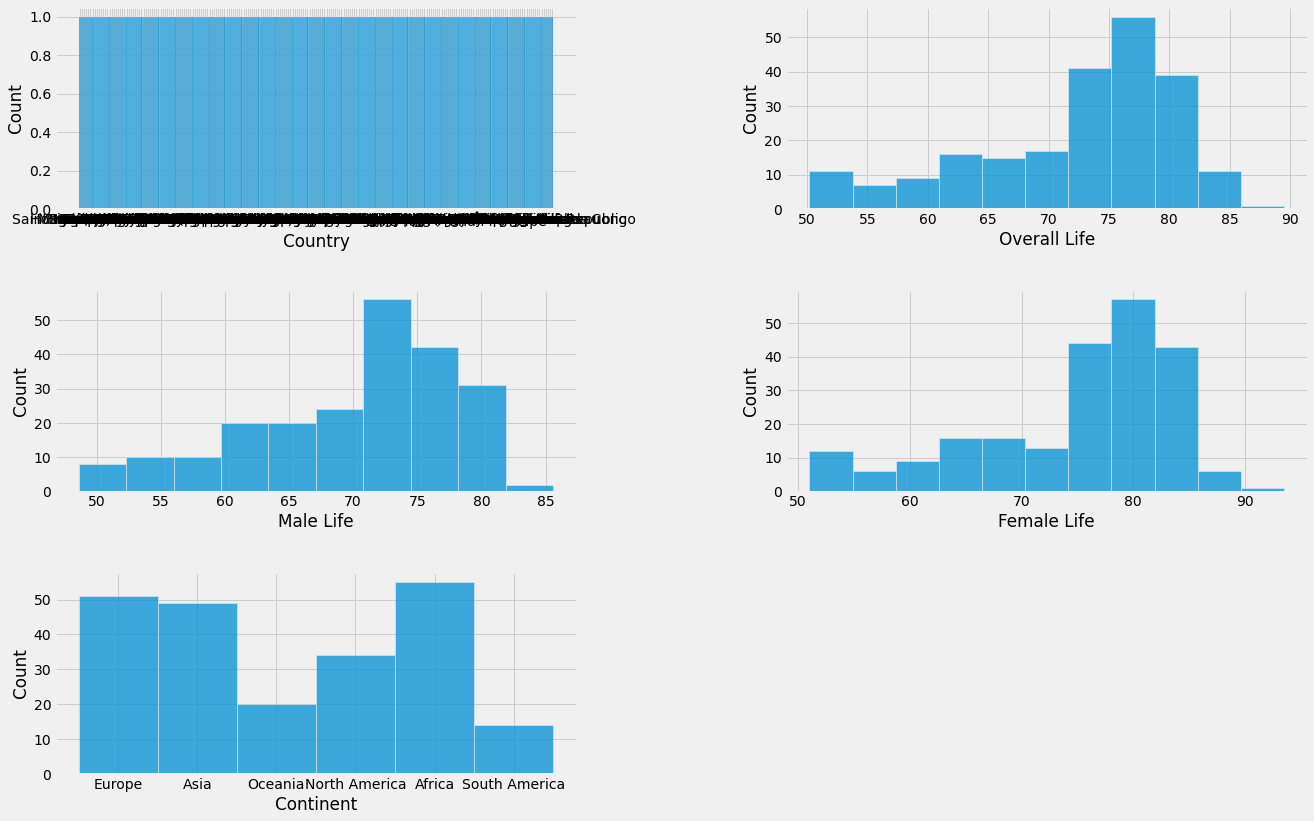

In [11]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(rawdf.columns)):
    ax = fig.add_subplot(4, 2, i)
    #ax.hist(rawdf[rawdf.columns[i]])
    sns.histplot(rawdf[rawdf.columns[i]])
    plt.xlabel(rawdf.columns[i])

Dari hasil plot diatas dapat dilihat bahwa data masih tergolong terdistribusi secara normal.

In [77]:
rawdf[rawdf['Continent']== 'Asia'].head(10)

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster_id
1,2,Japan,85.0,81.7,88.5,Asia,2
2,3,Singapore,85.0,82.3,87.8,Asia,2
3,4,Macau; China,84.5,81.6,87.6,Asia,2
6,7,"Hong Kong, China",82.9,80.3,85.8,Asia,2
10,11,Israel,82.4,80.6,84.4,Asia,2
11,12,South Korea,82.4,79.3,85.8,Asia,2
39,40,Taiwan,80.1,77.0,83.5,Asia,2
49,50,Bahrain,78.9,76.7,81.1,Asia,2
53,54,Qatar,78.7,76.7,80.8,Asia,2
62,63,Kuwait,78.0,76.6,79.4,Asia,2


Dari benua asia hanya 4 negara yang mampu menempati Top 10 negara dengan overall life terbaik.

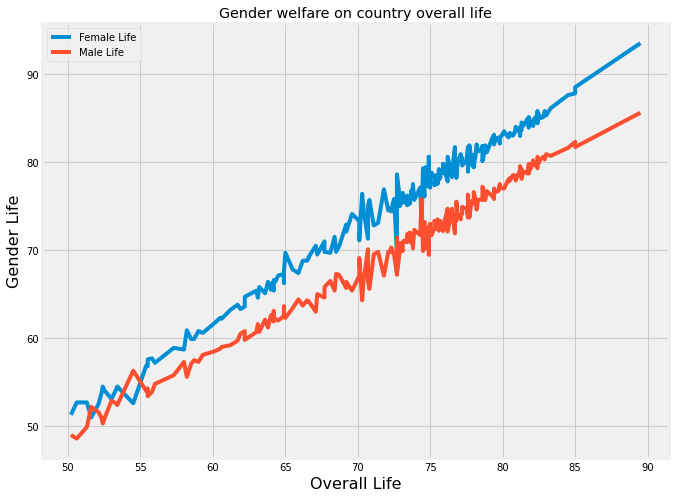

In [98]:
plt.figure(figsize=(10, 8))

plt.plot(rawdf['Overall Life'], rawdf['Female Life'], label='Female Life')
plt.plot(rawdf['Overall Life'], rawdf['Male Life'], label='Male Life')

plt.xlabel('Overall Life', fontsize=16)
plt.ylabel('Gender Life', fontsize=16)
plt.title('Gender welfare on country overall life')
plt.legend()


Mayoritas negara memprioritaskan kesejahteraan perempuan dibandingkan laki-laki di negaranya masing-masing.

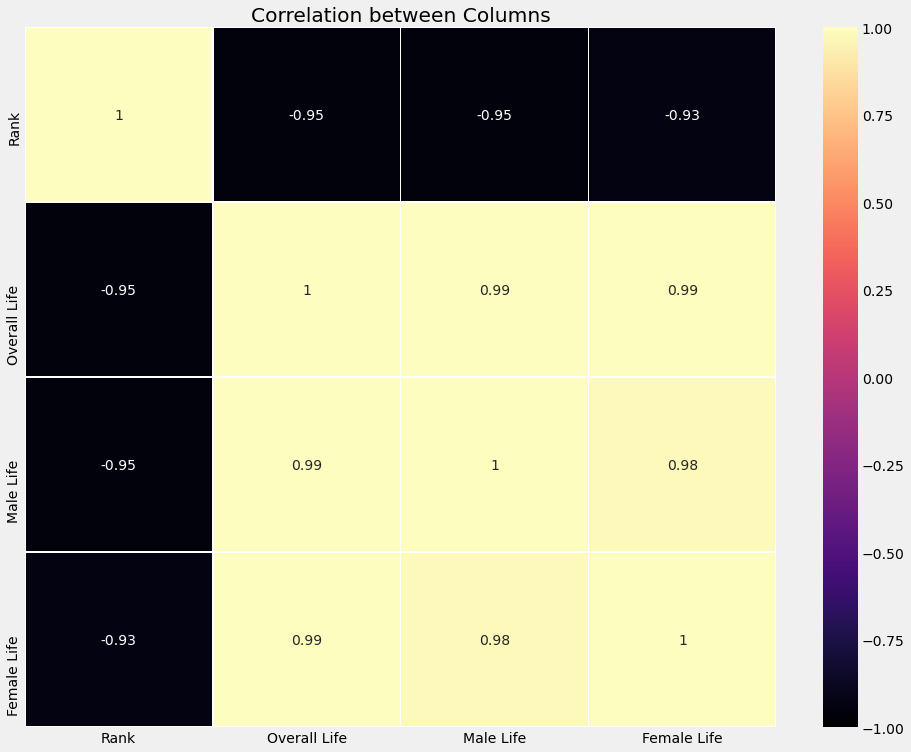

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(rawdf.corr(), vmin=-1, vmax=1, cmap='magma', annot=True, linewidths=.9)
plt.title("Correlation between Columns")
plt.show()

Hasil korelasi antar kolom menunjukkan hal yang cukup menarik yakni hanya kolom Rank dengan kolom lainnya yang berkorelasi negatif. Artinya jika nilai salah satu kolom mengalami kenaikan maka yang lainnya akan mengalami penurunan. 


# Data Preprocessing

## Features Encoding

In [36]:
country_dummies = pd.get_dummies(rawdf['Country'], prefix = 'Country')
new_df = pd.concat([rawdf, country_dummies], axis = 1)

In [37]:
continent_dummies = pd.get_dummies(rawdf['Continent'], prefix = 'Continent')
new_df = pd.concat([new_df, continent_dummies], axis = 1)

In [38]:
new_df = new_df.drop(columns=['Country', 'Continent','Rank'])

In [39]:
new_df.head(5)

,Overall Life,Male Life,Female Life,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Burma,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Comoros,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,...,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_S�o Tom� and Pr�ncipe,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_The Bahamas,Country_The Gambia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_U.S. Virgin Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_West Bank,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,89.5,85.6,93.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,85.0,81.7,88.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,85.0,82.3,87.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,84.5,81.6,87.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,83.3,80.7,86.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## PCA

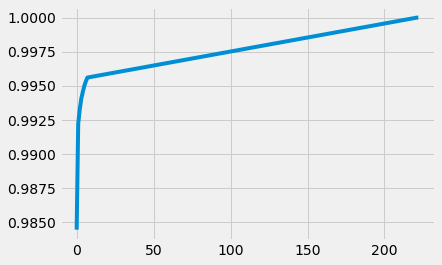

In [40]:
pca=PCA(whiten=True)
pca.fit(new_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

Dari hasil plot dapat terlihat secara kasar bahwa hanya dengan 2 kolom features saja sudah mewakili hampir 99% dari data asli.

In [41]:
# mengambil 90% dari data asli
pca=PCA(n_components=0.90, whiten=True)
pca.fit(new_df)

print('Jumlah kolom untuk mendapatkan 90% dari data asli: ', pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

Jumlah kolom untuk mendapatkan 90% dari data asli:  1
0.9844487810071013


Disini saya ingin mengetahui berapa jumlah kolom yang dibutuhkan untuk mewakili 90% data dari dataset asli namun ternyata hanya dibutuhkan 1 kolom untuk mewakili 98% dari keseluruhan data.

## Scaling

In [46]:
scaler = StandardScaler()
new_df_std = scaler.fit_transform(new_df)

<AxesSubplot:>

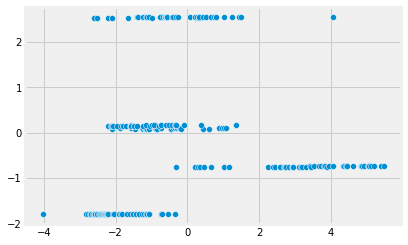

In [47]:
# reduction data with PCA and plot it

df_pca = PCA(n_components=2).fit_transform(new_df_std)
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1])

# Model

In [50]:
# n_clusters berdasarkan PCA
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=2, random_state=42)

# Model Evaluation

<AxesSubplot:>

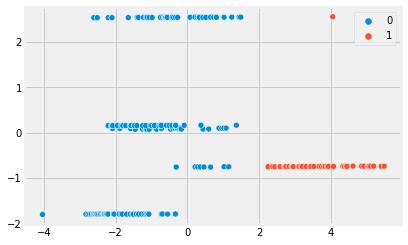

In [51]:
sns.scatterplot(x=df_pca[:,0],y=df_pca[:,1], hue=kmeans.labels_)

Text(0, 0.5, 'Inertia')

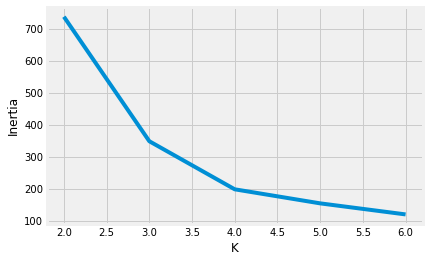

In [52]:
K =[2,3,4,5,6]
inertia = [KMeans(n_clusters=i).fit(df_pca).inertia_ for i in K]

plt.plot(K, inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Dari Elbow Method, secara kasar dapat terlihat jumlah optimal cluster (K) untuk model K-Means adalah 4.

Text(0, 0.5, 'Silhouette Score')

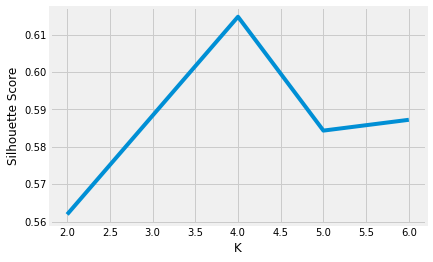

In [55]:
# plot hasil skor silhouette
K = [2,3,4,5,6]

s_score=[silhouette_score(df_pca, KMeans(n_clusters=i).fit(df_pca).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Namun ternyata setelah di cek dengan silhouette_score, cluster yang optimal adalah 4 dengan skor 0.61.

*Catatan: Silhouette score semakin mendekati angka 1 semakin baik. Cluster terpisah dan dapat dibedakan dengan baik.*

# Model Inference

In [58]:
kmeans.predict(df_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [60]:
# predict with standardized data
kmeans.predict(new_df_std[:,:2])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [61]:
# n_clusters berdasarkan hasil silhouette score
kmeans_new = KMeans(n_clusters=4, random_state=42)
kmeans_new.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [62]:
rawdf['cluster_id'] = kmeans_new.labels_

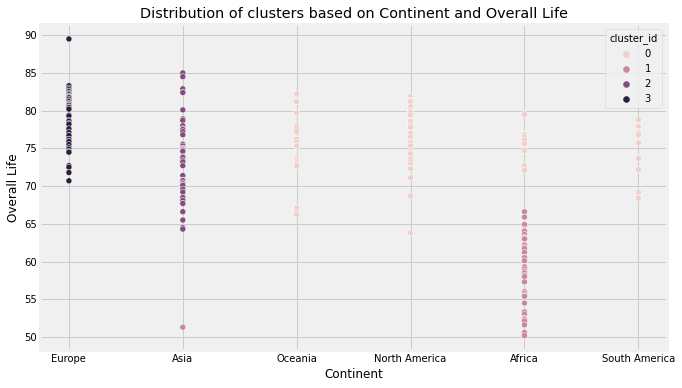

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rawdf, x='Continent', y='Overall Life', hue='cluster_id')
plt.title('Distribution of clusters based on Continent and Overall Life')
plt.show()

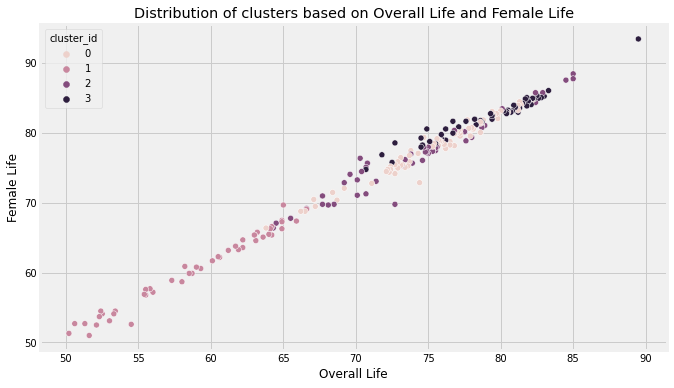

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rawdf, x='Overall Life', y='Female Life', hue='cluster_id')
plt.title('Distribution of clusters based on Overall Life and Female Life')
plt.show()

### Separate every cluster

<AxesSubplot:xlabel='Overall Life', ylabel='Female Life'>

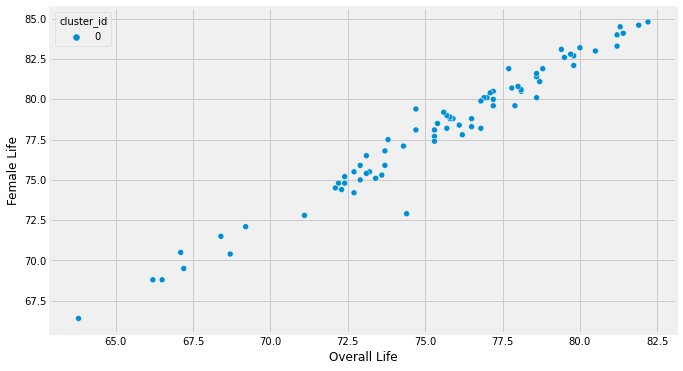

In [127]:
a0 = rawdf[rawdf['cluster_id']==0]
a1 = rawdf[rawdf['cluster_id']==1]
a2 = rawdf[rawdf['cluster_id']==2]
a3 = rawdf[rawdf['cluster_id']==3]

plt.figure(figsize=(10,6))
sns.scatterplot(data=rawdf, x=a0['Overall Life'], y=a0['Female Life'], hue=a0['cluster_id'])

<AxesSubplot:xlabel='Overall Life', ylabel='Female Life'>

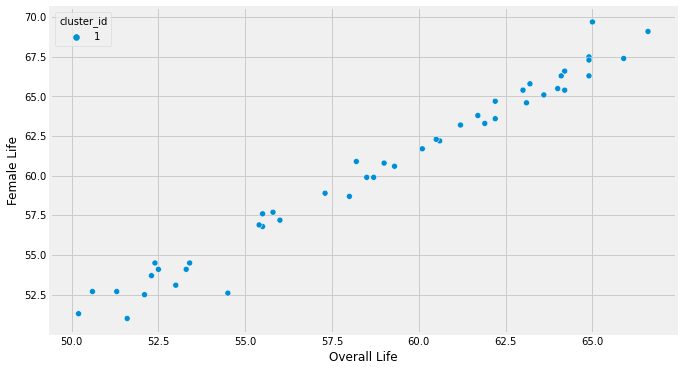

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rawdf, x=a1['Overall Life'], y=a1['Female Life'], hue=a1['cluster_id'])

<AxesSubplot:xlabel='Overall Life', ylabel='Female Life'>

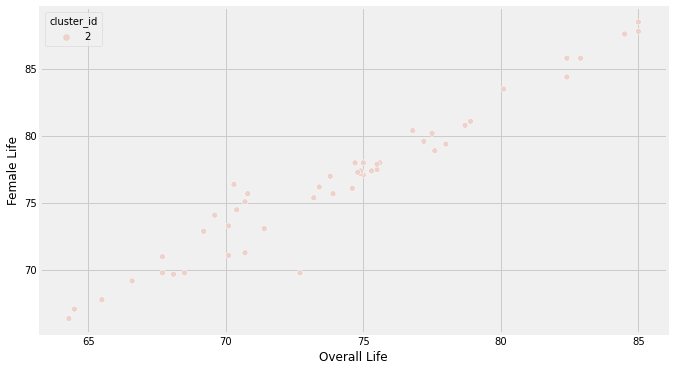

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rawdf, x=a2['Overall Life'], y=a2['Female Life'], hue=a2['cluster_id'])

<AxesSubplot:xlabel='Overall Life', ylabel='Female Life'>

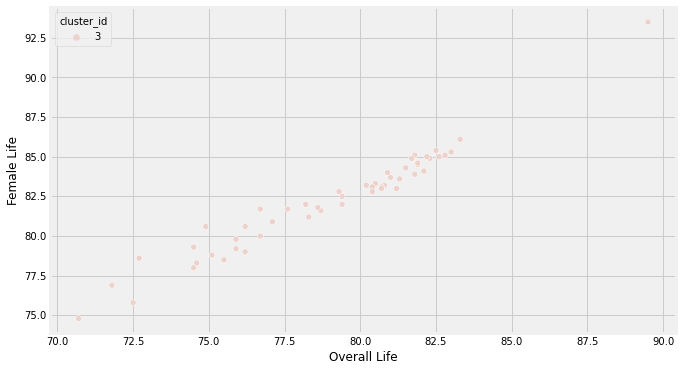

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rawdf, x=a3['Overall Life'], y=a3['Female Life'], hue=a3['cluster_id'])

# Conclusion

## EDA Analysis

- Dari hasil histplot dataset dapat dilihat bahwa data masih tergolong terdistribusi secara normal. Mungkin hal ini terjadi karena dataset telah dibersihkan sebelumnya.
- Dari benua asia hanya 4 negara yang mampu menempati Top 10 negara dengan overall life terbaik.
- Mayoritas negara memprioritaskan kesejahteraan perempuan dibandingkan laki-laki di negaranya masing-masing.
- Hasil korelasi antar kolom menunjukkan hal yang cukup menarik yakni hanya kolom Rank yang berkorelasi negatif dengan kolom lainnya . Artinya jika nilai salah satu kolom mengalami kenaikan maka yang lainnya akan mengalami penurunan.


## Model Analysis

K-Means = Dapat memisahkan data menjadi beberapa cluster sesuai yang kita inginkan. Disini jumlah cluster yang ingin kita gunakan berdasarkan hasil reduksi dimensi PCA adalah 2. Namun berdasarkan perhitungan silhouette score, jumlah cluster optimum adalah 4 dengan nilai 0.61

Dari hasil clustering menggunakan K-Means, data dibagi menjadi 4 cluster. Pada model inference, jika melihat dari plot pertama antara continent dan overall life, K-Means dapat mengelompokkan dengan cukup jelas data mana saja yang termasuk ke dalam benua dengan kesejahteraan hidup yang rendah dan tinggi. Untuk benua dengan kesejahteraan menengah masih ada bias disana.

Sementara dari plot kedua antara "overall life" dan "female life", K-Means masih dapat mengelompokkan data dengan kesejahteraan rendah dengan baik jelas terlihat perbedaannya. Namun untuk kesejahteraan tinggi dan menengah masih tercampur disana. Bisa saja dikarenakan banyak data yang berkumpul disana, sehingga saling tumpang tindih. Mungkin juga dikarenakan *point of view 2D* sehingga kita tidak dapat melihatnya secara lebih baik.

Hasil clustering dapat terlihat lebih jelas setelah dipisah per masing-masing cluster. K-Means hanya mampu memisahkan dengan cukup baik antara kelompok dengan *overall life* rendah dan tinggi, jika masih level menengah K-Means belum mampu memisahkannya dengan baik.